In [20]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add the parent directory to the Python path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))


In [21]:
sys.path.append("../")

In [4]:
from scripts.data_loader import load_data

# Load the text file into a Pandas DataFrame
df = pd.read_csv('../data/data.txt', delimiter='|')  # Adjust the delimiter as needed

df.head()

C:\Users\bethelhem.teka\AppData\Local\Temp\ipykernel_16296\88131431.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/data.txt', delimiter='|')  # Adjust the delimiter as needed


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


### Descriptive Statistics: Calculate the variability for numerical features such as TotalPremium, TotalClaim, etc.

In [7]:
# Specify the columns to calculate variability from df
selected_columns = ['TotalPremium', 'TotalClaims']

# Initialize a dictionary to store variability stats
variability_stats = {
    'Feature': [],
    'Range': [],
    'Variance': [],
    'Standard Deviation': [],
    'IQR': [],
    'CV': []
}

# Loop through the selected columns and calculate variability
for column in selected_columns:
    feature_data = df[column]
    range_val = feature_data.max() - feature_data.min()
    variance_val = feature_data.var()  # Variance
    sd_val = feature_data.std()        # Standard Deviation
    iqr_val = feature_data.quantile(0.75) - feature_data.quantile(0.25)  # IQR
    cv_val = (sd_val / feature_data.mean()) * 100  # Coefficient of Variation (CV in %)
    
    # Append results
    variability_stats['Feature'].append(column)
    variability_stats['Range'].append(range_val)
    variability_stats['Variance'].append(variance_val)
    variability_stats['Standard Deviation'].append(sd_val)
    variability_stats['IQR'].append(iqr_val)
    variability_stats['CV'].append(cv_val)

# Create a DataFrame for the variability statistics
variability_df = pd.DataFrame(variability_stats)
variability_df.head()


,Feature,Range,Variance,Standard Deviation,IQR,CV
0,TotalPremium,66065.180175,5.303096e+04,230.284513,21.929825,371.993648
1,TotalClaims,405094.517544,5.683812e+06,2384.074695,0.000000,3675.656741


In [10]:
# Data Summarization - Descriptive Statistics
desc_stats = df.describe()
desc_stats

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [9]:
# Data Structure
data_types = df.dtypes
data_types

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [22]:
# Check for missing values
print("Missing Values Per Column:")
print(df.isnull().sum())

Missing Values Per Column:
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
N

### Univariate Analysis:

Statistics for TotalPremium:
count    1.000098e+06
mean     6.190550e+01
std      2.302845e+02
min     -7.825768e+02
25%      0.000000e+00
50%      2.178333e+00
75%      2.192982e+01
max      6.528260e+04
Name: TotalPremium, dtype: float64




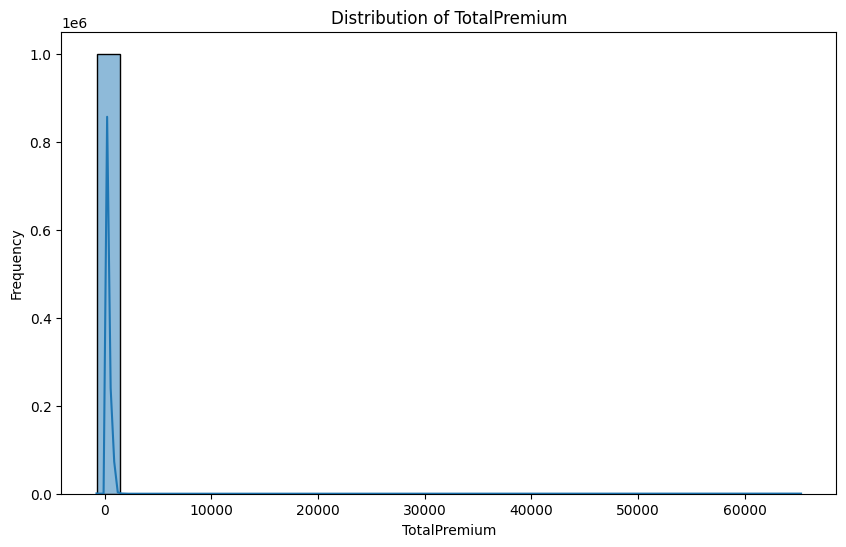

Statistics for TotalClaims:
count    1.000098e+06
mean     6.486119e+01
std      2.384075e+03
min     -1.200241e+04
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.930921e+05
Name: TotalClaims, dtype: float64




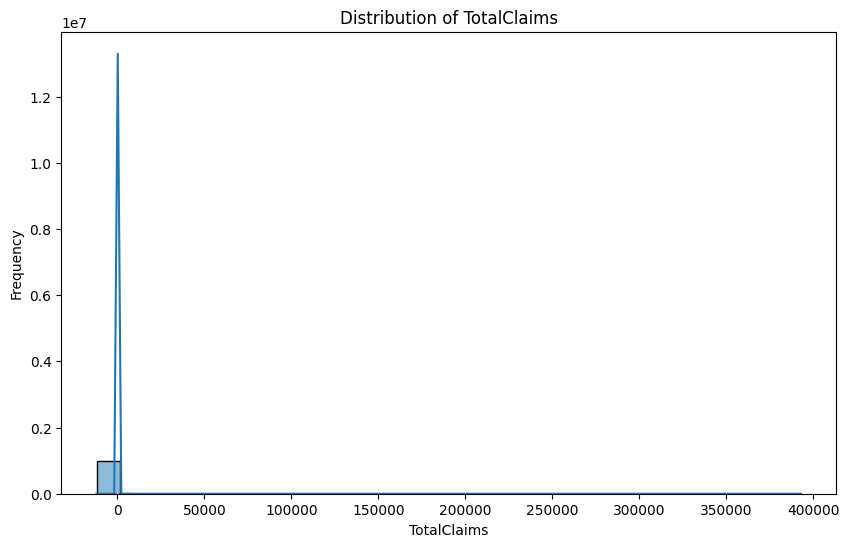

In [23]:
# Univariate Analysis - Distribution of Numerical Variables
numerical_columns = ['TotalPremium', 'TotalClaims']
for col in numerical_columns:
    # Display key statistics
    print(f"Statistics for {col}:")
    print(df[col].describe())
    print("\n")
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Counts for CoverType:
CoverType
Own Damage                                             104183
Passenger Liability                                    104158
Windscreen                                             103763
Third Party                                            102825
Keys and Alarms                                        102428
Signage and Vehicle Wraps                              102416
Emergency Charges                                      102416
Cleaning and Removal of Accident Debris                102414
Income Protector                                        64813
Basic Excess Waiver                                     57769
Accidental Death                                        27321
Credit Protection                                       18070
Roadside Assistance                                      3834
Deposit Cover                                            1299
Asset Value Preserver                                     865
Standalone passenger liability        

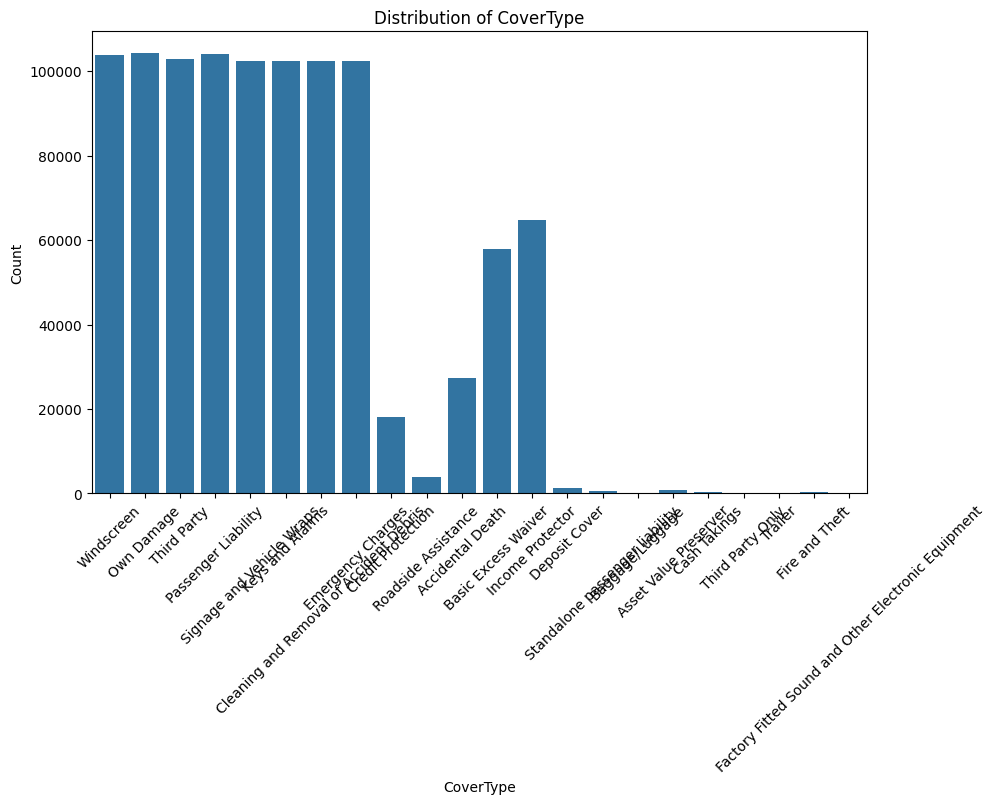

Counts for VehicleType:
VehicleType
Passenger Vehicle    933598
Medium Commercial     53985
Heavy Commercial       7401
Light Commercial       3897
Bus                     665
Name: count, dtype: int64




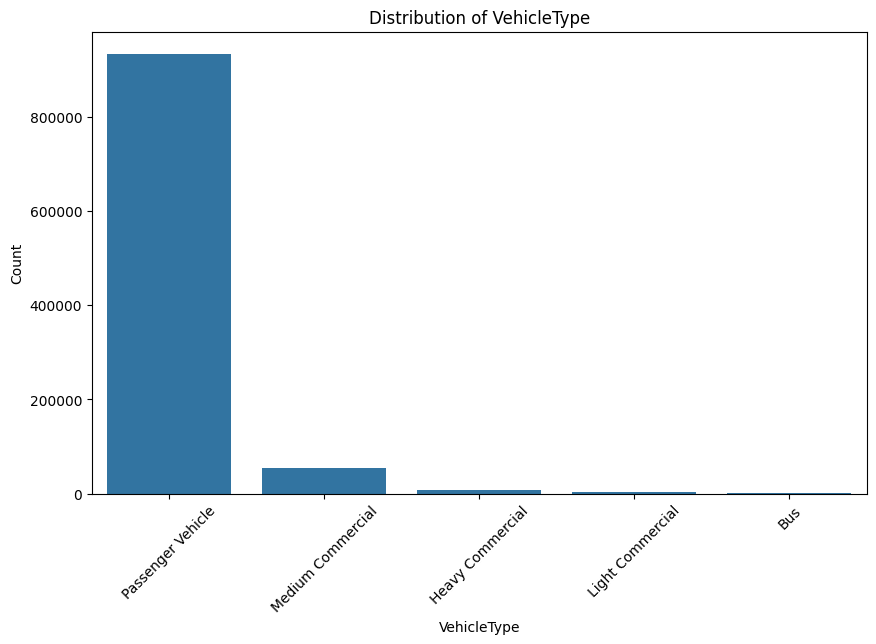

Counts for PostalCode:
PostalCode
2000    133498
122      49171
7784     28585
299      25546
7405     18518
         ...  
7340         1
7760         1
7280         1
322          1
6655         1
Name: count, Length: 888, dtype: int64




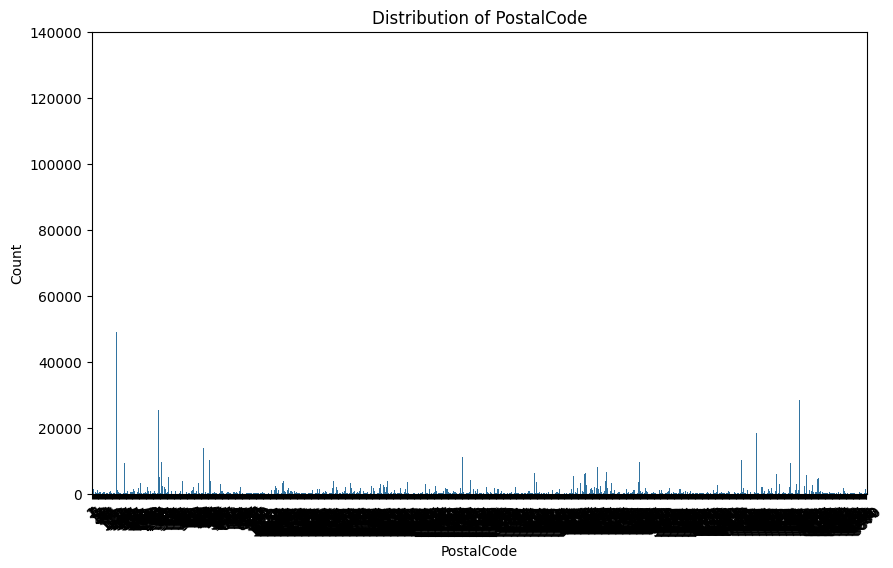

In [26]:
# Univariate Analysis - Distribution of Categorical Variables
categorical_columns = ['CoverType', 'VehicleType', 'PostalCode']
for col in categorical_columns:
    # Display counts for each category
    print(f"Counts for {col}:")
    print(df[col].value_counts())
    print("\n")
    
    # Plot bar chart
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## Bivariate Analysis:

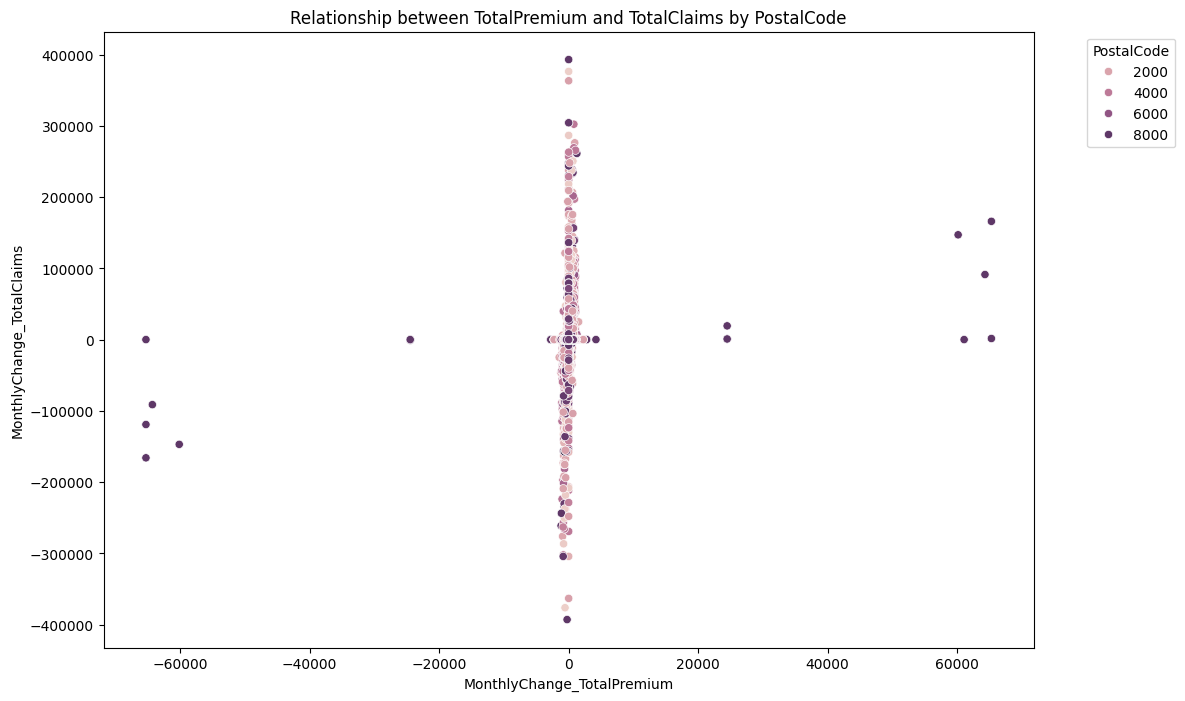

In [33]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
df['Month'] = df['TransactionMonth'].dt.month

# Calculate monthly changes
df['MonthlyChange_TotalPremium'] = df.groupby('PostalCode')['TotalPremium'].diff()
df['MonthlyChange_TotalClaims'] = df.groupby('PostalCode')['TotalClaims'].diff()



# Scatter Plot for each PostalCode
postalcodes = df['PostalCode'].unique()
# Exploring relationships between TotalPremium and TotalClaims
plt.figure(figsize=(12, 8))
sns.scatterplot(x='MonthlyChange_TotalPremium', y='MonthlyChange_TotalClaims', hue='PostalCode', data=df)
plt.title('Relationship between TotalPremium and TotalClaims by PostalCode')
plt.xlabel('MonthlyChange_TotalPremium')
plt.ylabel('MonthlyChange_TotalClaims')
plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Correlation Matrix:
                            MonthlyChange_TotalPremium  \
MonthlyChange_TotalPremium                    1.000000   
MonthlyChange_TotalClaims                     0.105492   

                            MonthlyChange_TotalClaims  
MonthlyChange_TotalPremium                   0.105492  
MonthlyChange_TotalClaims                    1.000000  




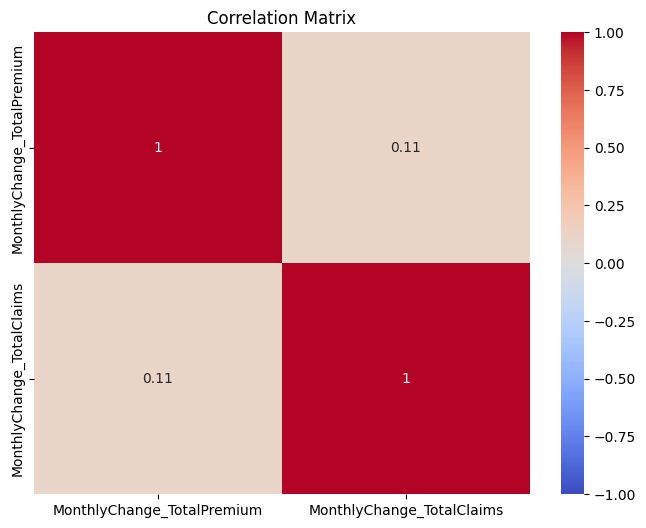

In [34]:
# Correlation Matrix
correlation_matrix = df[['MonthlyChange_TotalPremium', 'MonthlyChange_TotalClaims']].corr()
print("Correlation Matrix:")
print(correlation_matrix)
print("\n")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Data Comparison: Trends Over Geography


<Figure size 1400x800 with 0 Axes>

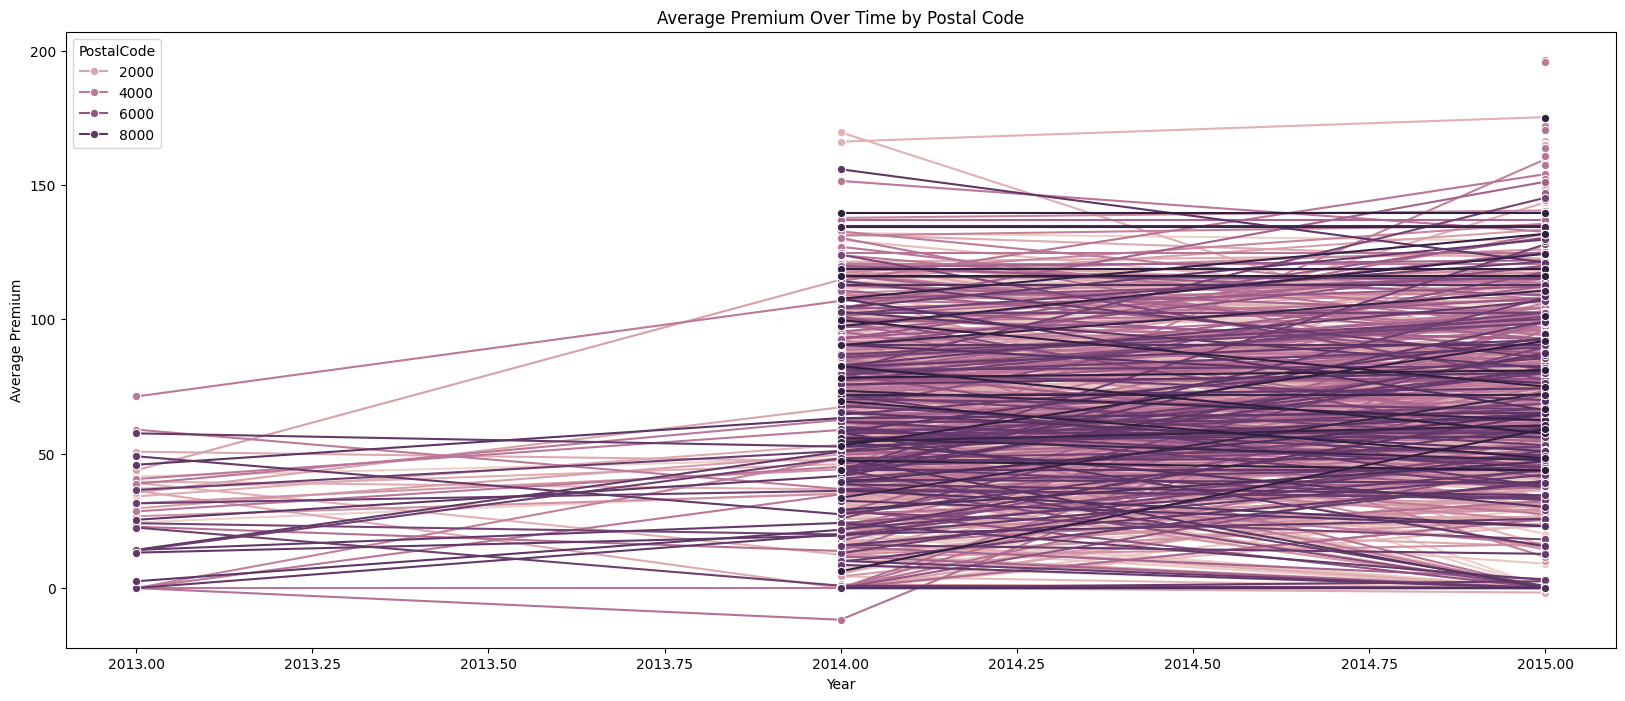

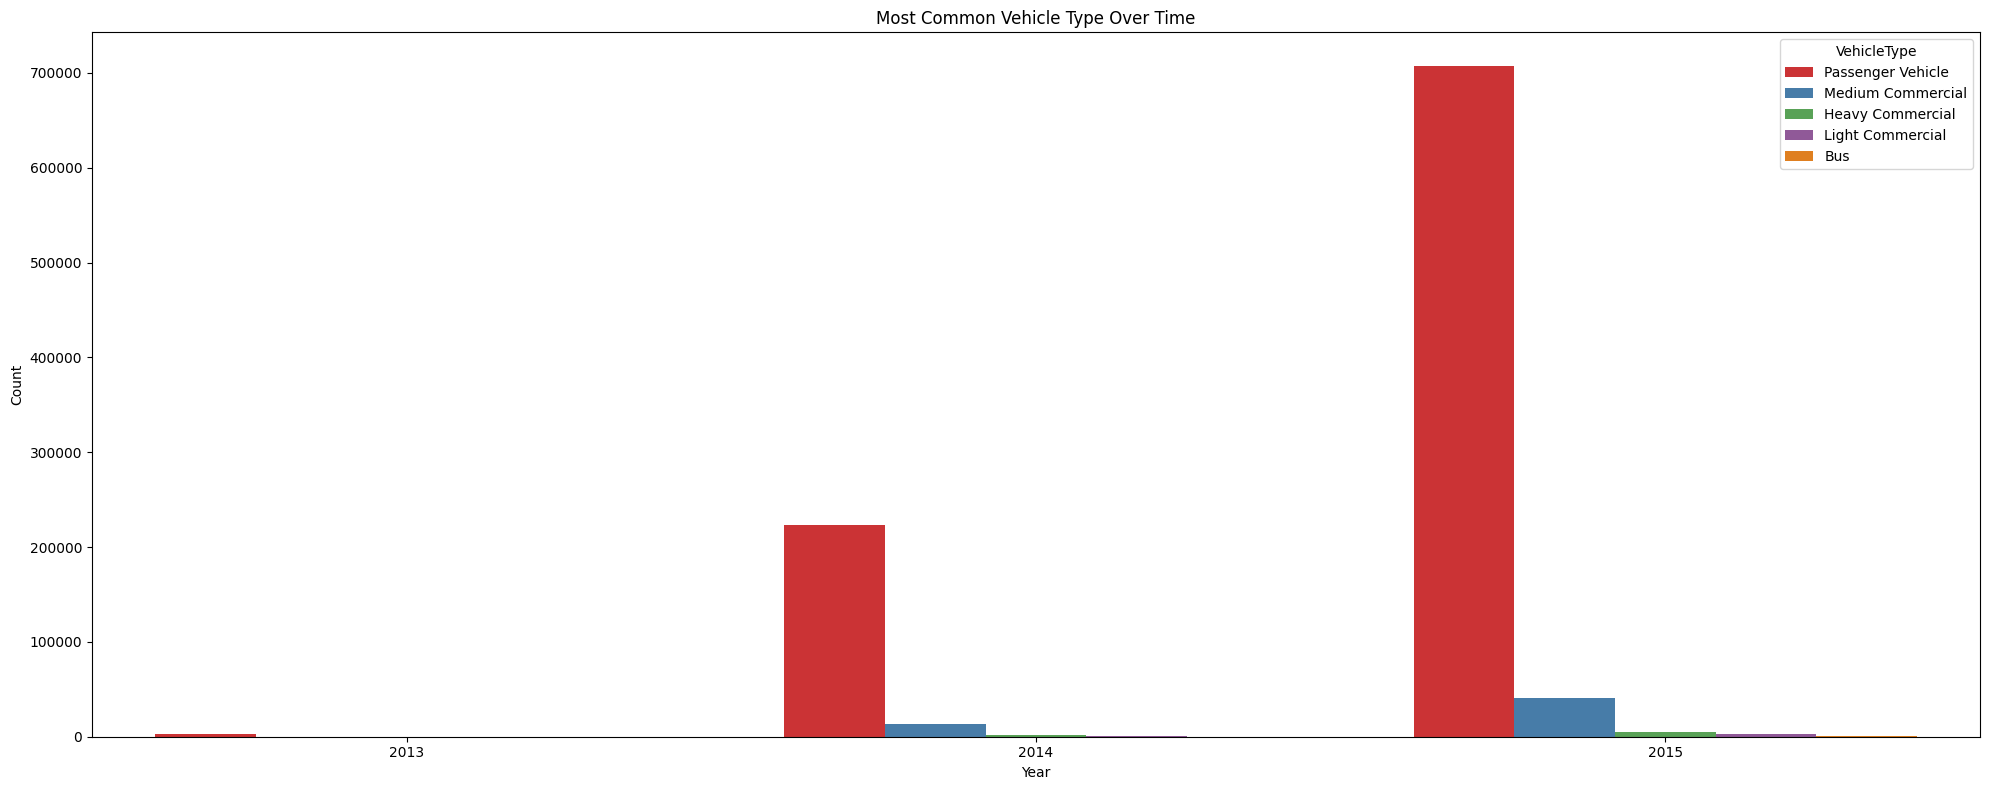

In [48]:

# Extract year from the TransactionMonth
df['Year'] = df['TransactionMonth'].dt.year

# Group the data by PostalCode and Year
df_grouped = df.groupby(['PostalCode', 'Year']).agg(
    avg_premium=('TotalPremium', 'mean'),
    most_common_cover=('CoverType', lambda x: x.mode()[0]),
    most_common_auto_make=('VehicleType', lambda x: x.mode()[0])
).reset_index()

# Plotting trends over time
plt.figure(figsize=(14, 8))

# Plot Average Premium over Time by Postal Code
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_grouped, x='Year', y='avg_premium', hue='PostalCode', marker='o')
plt.title('Average Premium Over Time by Postal Code')
plt.xlabel('Year')
plt.ylabel('Average Premium')

# Plot Most Common Vehicle Type over Time by Postal Code
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='Year', hue='VehicleType', palette='Set1')
plt.title('Most Common Vehicle Type Over Time')
plt.xlabel('Year')
plt.ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Count')

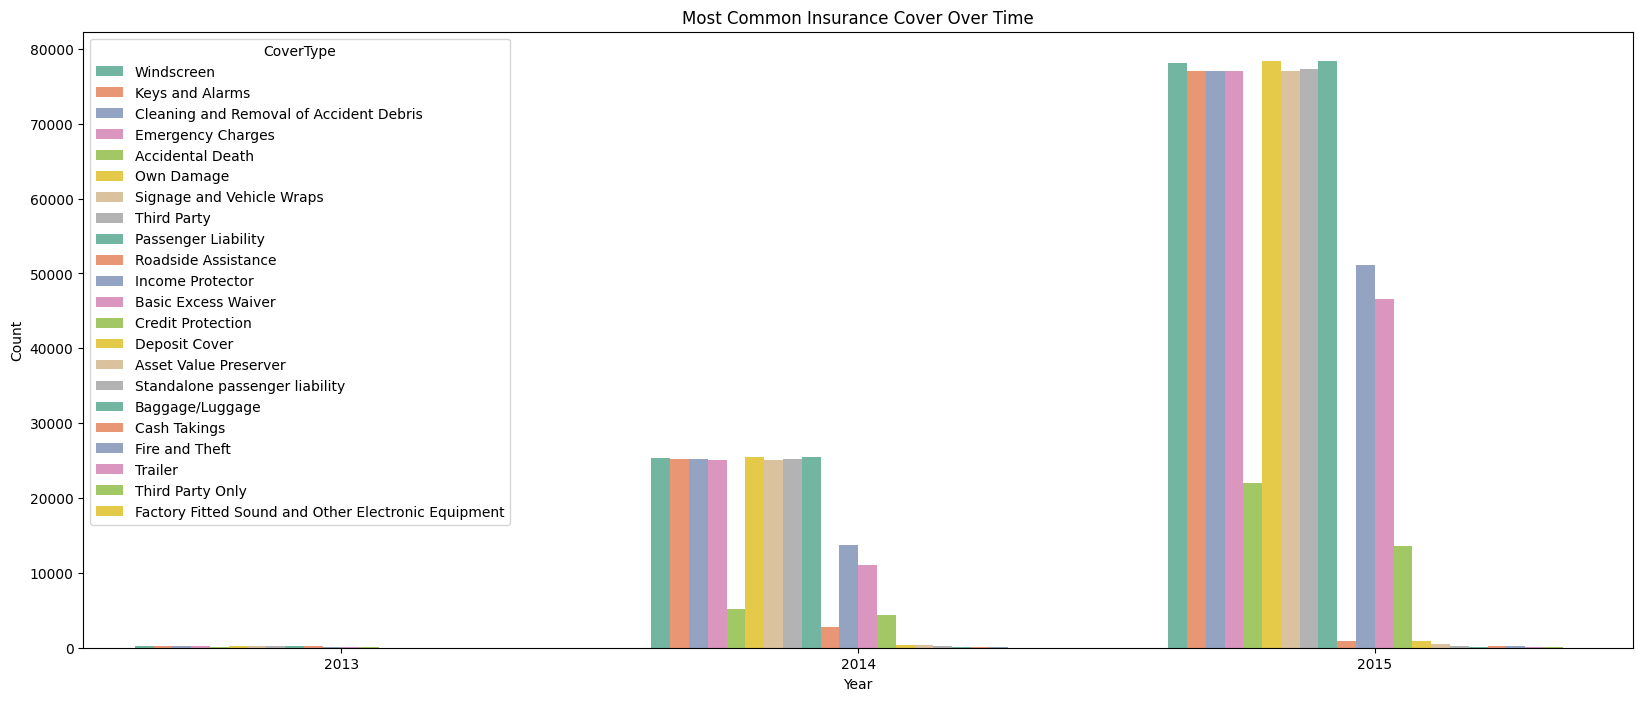

In [47]:
# Plot Most Common Insurance Cover over Time by Postal Code
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='Year', hue='CoverType', palette='Set2')
plt.title('Most Common Insurance Cover Over Time')
plt.xlabel('Year')
plt.ylabel('Count')

Summary statistics for TotalClaims:
count    1.000098e+06
mean     6.486119e+01
std      2.384075e+03
min     -1.200241e+04
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.930921e+05
Name: TotalClaims, dtype: float64




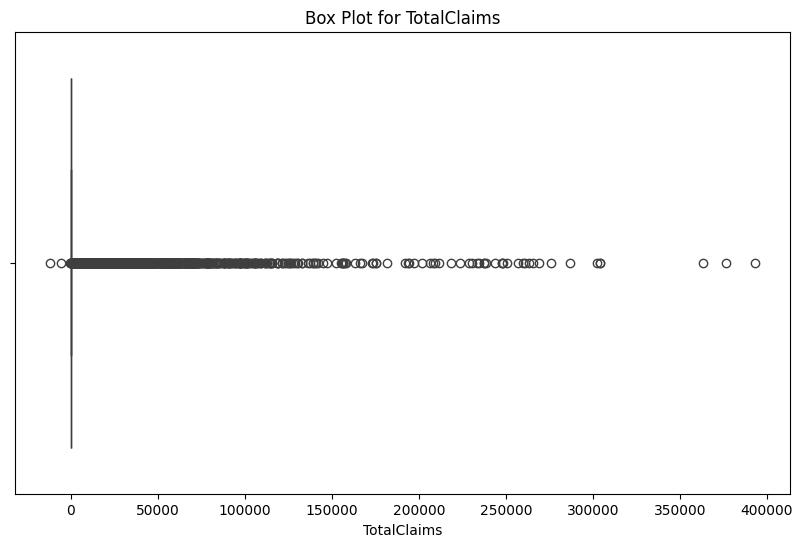

In [49]:
# Outlier Detection for TotalClaims

# Display key statistics for TotalClaims to identify potential outliers
print("Summary statistics for TotalClaims:")
print(df['TotalClaims'].describe())
print("\n")

plt.figure(figsize=(10, 6))
sns.boxplot(x='TotalClaims', data=df)
plt.title('Box Plot for TotalClaims')
plt.xlabel('TotalClaims')
plt.show()

## Visualization

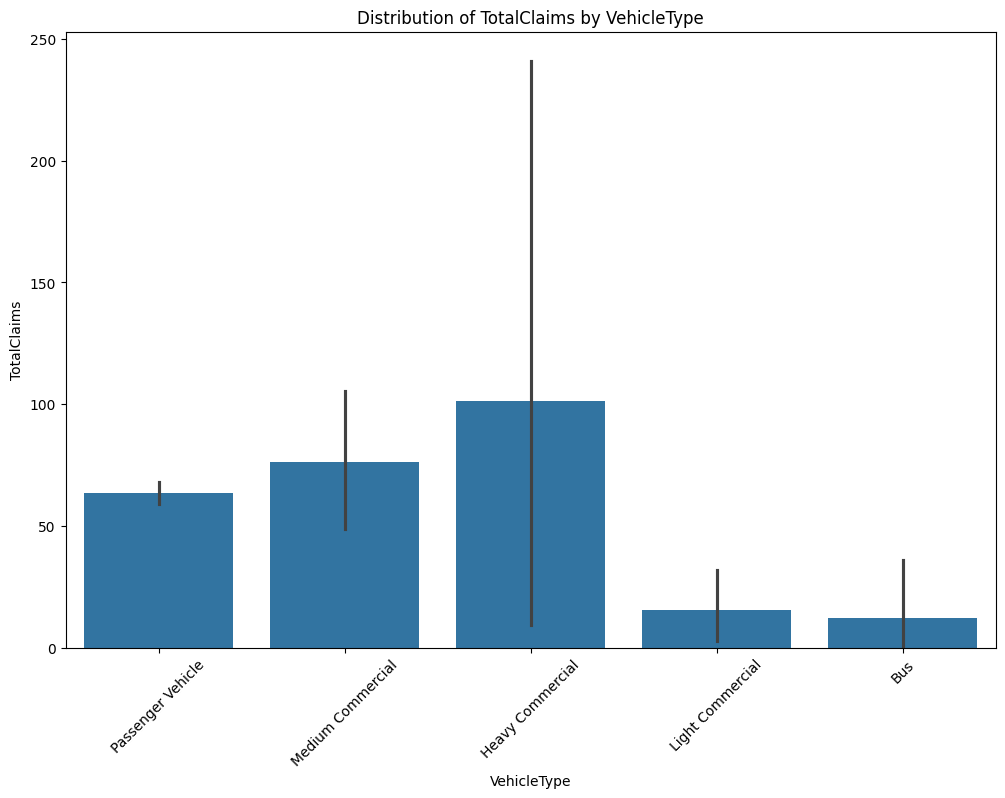

In [52]:
# Distribution of TotalClaims by VehicleType

plt.figure(figsize=(12, 8))
sns.barplot(x='VehicleType', y='TotalClaims', data=df)
plt.title('Distribution of TotalClaims by VehicleType')
plt.xlabel('VehicleType')
plt.ylabel('TotalClaims')
plt.xticks(rotation=45)
plt.show()

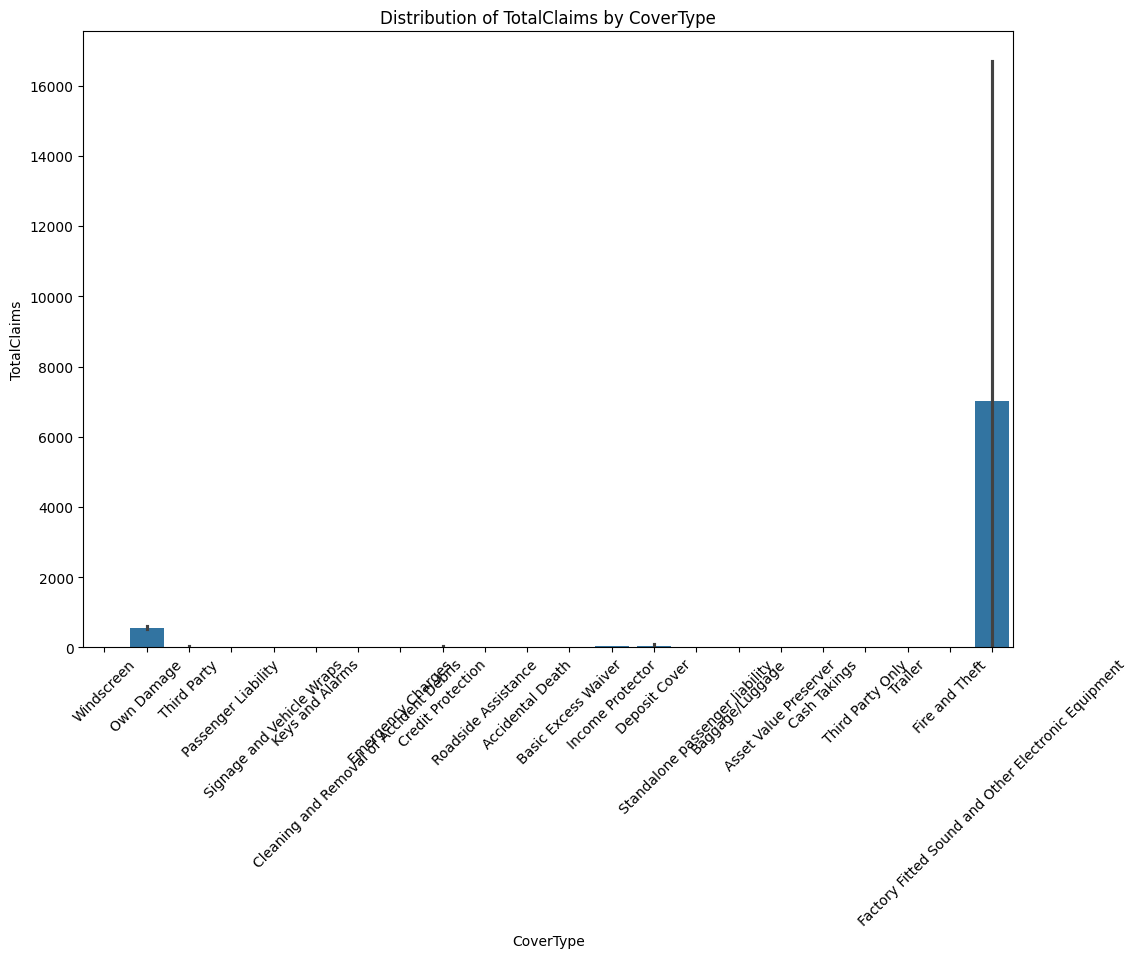

In [54]:
# Distribution of TotalClaims by CoverType

plt.figure(figsize=(12, 8))
sns.barplot(x='CoverType', y='TotalClaims', data=df)
plt.title('Distribution of TotalClaims by CoverType')
plt.xlabel('CoverType')
plt.ylabel('TotalClaims')
plt.xticks(rotation=45)
plt.show()